In [1]:
"""
Version of python 3.6.xx from Anaconda (64-bit) on Windows
Jupyter Notebook to run code
Author: Teo Wan Chun Jotham
"""
%matplotlib inline
from __future__ import division
import numpy as np
import pandas as pd
from numpy.linalg import inv,pinv
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as lns
from IPython.display import display, HTML

# Parsing Excel File
xls_file = pd.ExcelFile('Industry_Portfolios.xlsx')
df = xls_file.parse('Sheet1')
df = df.drop('Date', axis=1)

# Calculate the vector of mean returns and covariance matrix of returns
mean_ret = df.mean()
mean_ret = pd.DataFrame({'Mean Returns':df.mean()})
display(np.round(mean_ret.T, decimals=4))
display(np.round(df.cov(), decimals=4))

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Mean Returns,0.9028,0.7333,1.0128,1.2312,0.7662,0.8814,0.9163,0.7838,0.9072,0.4891


,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,11.1934,18.4497,14.1049,10.5313,12.9229,11.9681,10.1708,9.9531,7.8667,14.4384
Durbl,18.4497,69.9206,39.1781,27.0198,35.4667,27.4905,27.4447,16.8240,12.7461,39.3620
Manuf,14.1049,39.1781,28.1990,23.1454,24.6187,19.5501,17.6229,13.5964,11.4406,26.3134
Enrgy,10.5313,27.0198,23.1454,36.9849,19.2673,15.3668,11.2978,9.6303,14.0272,18.3205
HiTec,12.9229,35.4667,24.6187,19.2673,28.9572,18.7083,17.8371,13.2541,10.3042,23.8555
Telcm,11.9681,27.4905,19.5501,15.3668,18.7083,19.7872,14.1694,11.5066,10.9916,19.6108
Shops,10.1708,27.4447,17.6229,11.2978,17.8371,14.1694,16.7591,10.1788,6.6944,19.2265
Hlth,9.9531,16.8240,13.5964,9.6303,13.2541,11.5066,10.1788,14.3427,7.4750,14.8646
Utils,7.8667,12.7461,11.4406,14.0272,10.3042,10.9916,6.6944,7.4750,13.7031,9.9930
Other,14.4384,39.3620,26.3134,18.3205,23.8555,19.6108,19.2265,14.8646,9.9930,31.1638


,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Weights (%),56.797218,-21.40726,71.410511,10.408719,-36.343817,-9.546326,99.164683,7.55702,13.264333,-91.305081


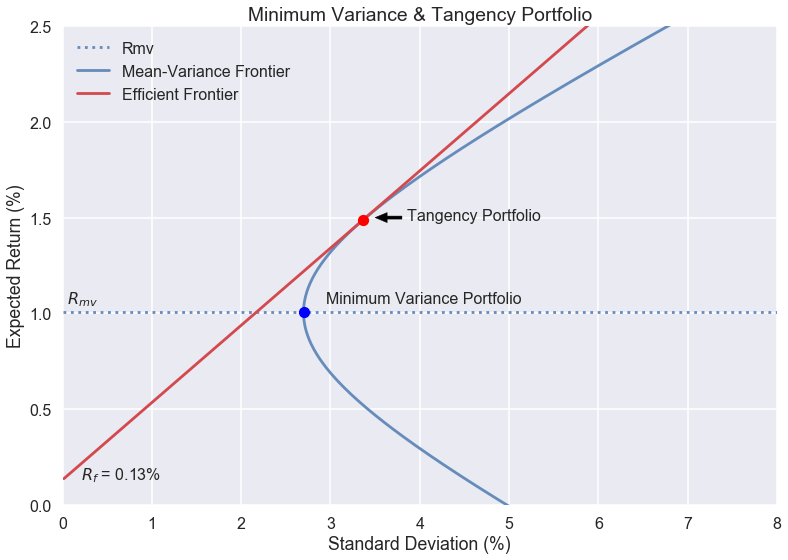

In [22]:
# Input of mean return & covariance matrix using numpy matrix
R = np.matrix(df.mean())
R = np.matrix(R.T) # column vector of mean returns 
V = np.matrix(df.cov()) # covariance matrix of returns 
rf = 0.13 # risk-free rate

# Define e
e = np.ones((len(R),1)) # n x 1 vector of ones, column vector of ones
#SD = np.sqrt(np.diag(V)) # extract diagonal of df.cov to get the variance of all assets. To extract upper diaganol -> np.diag(x, k=1)

# Variable for Efficient frontier
delta = e.T*pinv(V)*e # eV-1e, row vector x matrix x column vector => 1 answer in matrix. pinv() -> pseudo-inverse of a matrix
alpha = R.T*pinv(V)*e # R'V-1e, row vector x matrix x column vector => 1 answer in matrix
zeta = R.T*pinv(V)*R # R'V-1R, row vector x matrix x column vector => 1 answer in matrix
D = zeta*delta-alpha**2 # denominator, 1 answer in matrix

########################################################
#EFFICIENT FRONTIER
########################################################
# Efficient Frontier Range for Return
# Return evenly spaced values within a given interval e.g. np.arange(start,stop,step)
mu = np.arange(-max(R),max(R)*5,max(R)/100); 

# Plot Efficient Frontier
minvar = ((delta*mu**2)-2*alpha*mu+zeta)/D; # Calculate variance of return for frontier portfolio
minstd = np.sqrt(minvar)[0]; # min. std deviation
minstd = np.squeeze(np.asarray(minstd)) # np.asarray is to modify minstd, np.squeeze is to remove any 1-dimensional array

########################################################
#MINIMUM VARIANCE PORTFOLIO
########################################################
# Mean and Variance of Minimum Variance Portfolio
mu_g = alpha/delta
var_g = 1/delta
std_g = np.sqrt(var_g)

# Minimum Variance Portfolio Weights
w_g = (pinv(V)*e)/delta

########################################################
#TANGENT PORTFOLIO
########################################################
# Expected Return of Tangency Portfolio/ Risk Premium for tangency portfolio
mu_tan = (alpha*rf-zeta)/(delta*rf-alpha);
 
# Variance and Standard Deviation of Tangency Portfolio
vartan = (zeta-2*rf*alpha + (rf**2*delta))/((alpha-delta*rf)**2);
stdtan = np.sqrt(vartan);

# Weights for Tangency Portfolio
w_tan = (pinv(V)*(R - rf*e))/(alpha-delta*rf) 

# Tangency Line
m_tan = mu[mu >= rf]; 
minvar_rf = (m_tan-rf)**2/(zeta-2*rf*alpha+delta*rf**2);
minstd_rf = np.sqrt(minvar_rf);
minstd_rf = np.squeeze(np.asarray(minstd_rf))

# Seaborn aesthetics settings
sns.set_context("poster")

# Axis settings
axes = plt.gca()
axes.set_xlim([0,8])
axes.set_ylim([0,2.5])
ax = plt.axes()

# Print out weights of the 10 assets from Tangency Portfolio
w_tan = w_tan.T*100
title = "Weights (%)"
opt_weights = pd.DataFrame(w_tan, index=[title], columns=df.columns)
display(opt_weights)


# Plot minimum frontier portfolio with Tangency Portfolio
ax.axhline(mu_g, color='xkcd:faded blue', linestyle=':')
plt.plot(minstd,mu,'xkcd:faded blue',minstd_rf,m_tan,'xkcd:faded red',std_g,mu_g,'bo',stdtan,mu_tan,'ro') # plot efficient frontier with tangency portfolio
plt.title('Minimum Variance & Tangency Portfolio')
plt.ylabel('Expected Return (%)')
plt.xlabel('Standard Deviation (%)')
plt.text(0.05,0.05+mu_g,r'$R_{mv}$',fontsize=16);
plt.text(0.2,rf,r'$R_{f}$' ' = 0.13%',fontsize=16);
plt.text(0.25+std_g, 0.05+mu_g,'Minimum Variance Portfolio',fontsize=16);
plt.text(0.5+stdtan,mu_tan,'Tangency Portfolio',fontsize=16);

# Putting arrow & Legend
axes.annotate('',xy=(3.5,1.5), xytext=(3.8, 1.5), arrowprops=dict(facecolor='xkcd:black',width=3,headwidth=10))
axes.legend(['Rmv','Mean-Variance Frontier', 'Efficient Frontier'])
plt.show()